## Importing Libraries

In [26]:
import pandas as pd
import fast_ml
from sklearn.preprocessing  import OneHotEncoder
from fast_ml import eda
from sklearn.model_selection import train_test_split
import os
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score
import math
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import hydroeval as he
import seaborn as sns
import matplotlib as plt
%matplotlib inline

## Data Preparation

In [46]:
filepath='PROJECT DATA.xlsx'
df=pd.read_excel(filepath)
df.head(5)

,LOCATION,V25,V85,V90,PW,SW,MW,RA
0,1,20.0,80.0,96.66,7.41,2.5,0.46,No
1,2,20.0,80.0,96.66,7.41,2.5,0.46,No
2,3,20.0,80.0,96.66,7.41,2.5,0.46,No
3,4,20.0,80.0,96.66,7.41,2.5,0.46,No
4,5,20.0,80.0,96.66,7.41,2.5,0.46,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LOCATION   40 non-null     int64  
 1   V25        40 non-null     float64
 2   V85        40 non-null     float64
 3   V90        40 non-null     float64
 4   PW         40 non-null     float64
 5   SW         40 non-null     float64
 6   MW         40 non-null     float64
 7   RA         40 non-null     object 
dtypes: float64(6), int64(1), object(1)
memory usage: 2.6+ KB


In [9]:
df.describe()

,LOCATION,V25,V85,V90,PW,SW,MW
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,4.000000e+01
mean,20.500000,21.667500,82.501250,96.666250,7.540000,2.478750,4.600000e-01
std,11.690452,2.924988,3.270237,0.004903,0.161722,0.239842,4.829544e-16
min,1.000000,20.000000,80.000000,96.660000,7.410000,2.100000,4.600000e-01
25%,10.750000,20.000000,80.000000,96.660000,7.410000,2.400000,4.600000e-01
50%,20.500000,20.000000,80.000000,96.670000,7.490000,2.500000,4.600000e-01
75%,30.250000,21.667500,86.670000,96.670000,7.570000,2.710000,4.600000e-01
max,40.000000,26.670000,86.670000,96.670000,7.810000,2.710000,4.600000e-01


In [47]:
corr=df[['LOCATION ','V25','V85','V90','PW ','SW','MW']].corr()
corr

,LOCATION,V25,V85,V90,PW,SW,MW
LOCATION,1.000000,0.750234,0.167758,0.838788,0.854431,-0.476678,0.913048
V25,0.750234,1.000000,-0.447214,0.447214,0.976187,-0.923347,0.570796
V85,0.167758,-0.447214,1.000000,0.600000,-0.242536,0.756363,0.439158
V90,0.838788,0.447214,0.600000,1.000000,0.630593,-0.069504,0.949694
PW,0.854431,0.976187,-0.242536,0.630593,1.000000,-0.818066,0.725627
SW,-0.476678,-0.923347,0.756363,-0.069504,-0.818066,1.000000,-0.228935
MW,0.913048,0.570796,0.439158,0.949694,0.725627,-0.228935,1.000000


AttributeError: module 'matplotlib' has no attribute 'tick_params'

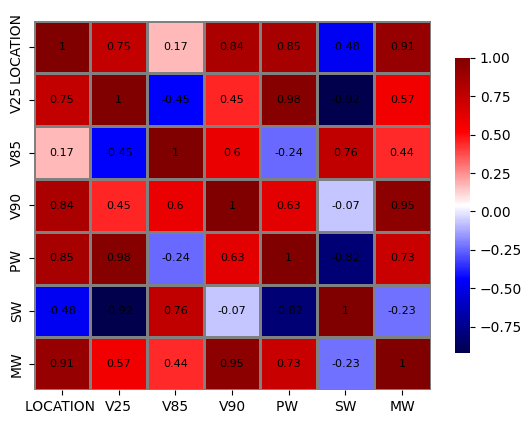

In [49]:
sns.heatmap(corr,
            cmap='seismic', 
                 linewidth=0.75,
                 linecolor='gray',
                 cbar_kws={"shrink": .8},
                 annot=True,
                 annot_kws={'size': 8, 'color': 'black'})
plt.tick_params(labelsize = 10, rotation = 45)
plt.title('Correlation Plot', size = 14)

## Split Data into Training and Testing Sets

In [4]:
# Drop the 'LOCATION' column
columns=['LOCATION ', 'V25','V90']
df = df.drop(columns=columns)

In [5]:
encoder = OneHotEncoder(drop='first',sparse_output=False)
encoded_RA = encoder.fit_transform(df[['RA']])
encoded_df=pd.DataFrame(encoded_RA)
df['RA']=encoded_df.astype('int')
df.head(5)

,V85,PW,SW,MW,RA
0,80.0,7.41,2.5,0.46,0
1,80.0,7.41,2.5,0.46,0
2,80.0,7.41,2.5,0.46,0
3,80.0,7.41,2.5,0.46,0
4,80.0,7.41,2.5,0.46,0


In [6]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Select the features to scale (exclude the target variable if present)
numeric_features = ['V85', 'MW', 'SW', 'MW']

# Fit and transform the selected numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Print the scaled DataFrame
print(df)

         V85   PW         SW            MW  RA
0  -0.774597  7.41  0.089729 -6.661338e-16   0
1  -0.774597  7.41  0.089729 -6.661338e-16   0
2  -0.774597  7.41  0.089729 -6.661338e-16   0
3  -0.774597  7.41  0.089729 -6.661338e-16   0
4  -0.774597  7.41  0.089729 -6.661338e-16   0
5  -0.774597  7.41  0.089729 -6.661338e-16   0
6  -0.774597  7.41  0.089729 -6.661338e-16   0
7  -0.774597  7.41  0.089729 -6.661338e-16   0
8  -0.774597  7.41  0.089729 -6.661338e-16   0
9  -0.774597  7.41  0.089729 -6.661338e-16   0
10 -0.774597  7.41  0.089729 -6.661338e-16   0
11 -0.774597  7.41  0.089729 -6.661338e-16   0
12 -0.774597  7.41  0.089729 -6.661338e-16   0
13 -0.774597  7.41  0.089729 -6.661338e-16   1
14 -0.774597  7.41  0.089729  3.330669e-16   0
15  1.290994  7.49  0.976461  3.330669e-16   0
16  1.290994  7.49  0.976461  3.330669e-16   0
17  1.290994  7.49  0.976461  3.330669e-16   0
18  1.290994  7.49  0.976461  3.330669e-16   0
19  1.290994  7.49  0.976461  3.330669e-16   0
20  1.290994 

In [7]:
#Seperating into feature and target variable
target='V85'
y=df[target]
X=df.drop(columns=target)


In [8]:
#Splitting into train and test set
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32, 4)
(32,)
(8, 4)
(8,)


In [9]:
#Saving dataset
X_train.to_csv(r'C:\Users\info\Desktop\Taiwo Folder\Python codes\Predict V85-Operating system\V85-Operating-Speed\X_train.csv', index=False)
X_test.to_csv(r'C:\Users\info\Desktop\Taiwo Folder\Python codes\Predict V85-Operating system\V85-Operating-Speed\X_test.csv', index=False)
y_train.to_csv(r'C:\Users\info\Desktop\Taiwo Folder\Python codes\Predict V85-Operating system\V85-Operating-Speed\y_train.csv', index=False)
y_test.to_csv(r'C:\Users\info\Desktop\Taiwo Folder\Python codes\Predict V85-Operating system\V85-Operating-Speed\y_test.csv', index=False)

In [10]:
os.chdir(r"C:\Users\info\Desktop\Taiwo Folder\Python codes\Predict V85-Operating system\V85-Operating-Speed")
os.getcwd()

X_train=pd.read_csv('x_train.csv')
y_train=pd.read_csv('y_train.csv')
X_test=pd.read_csv('x_test.csv')
y_test=pd.read_csv('y_test.csv')

# Ensure y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(32, 4)
(32,)
(8, 4)
(8,)


## Model Creation

In [12]:
# Initialize and train the GradientBoostingRegressor model
Rd = Ridge(alpha=0.1)
Rd.fit(X_train, y_train)

# Predictions for the train set
train_pred = Rd.predict(X_train)

print('Prediction for train set')
print('MAE is', metrics.mean_absolute_error(y_train, train_pred))
print('MSE is', metrics.mean_squared_error(y_train, train_pred))
print('RMSE is', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R_Sqd is', r2_score(y_train, train_pred))
print('Cor is', math.sqrt(r2_score(y_train, train_pred)))

print("")

# Predictions for the test set
test_pred = Rd.predict(X_test)

print('Prediction for test set')
print('MAE is', metrics.mean_absolute_error(y_test, test_pred))
print('MSE is', metrics.mean_squared_error(y_test, test_pred))
print('RMSE is', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('R_Sqd is', r2_score(y_test, test_pred))
print('Cor is', math.sqrt(r2_score(y_test, test_pred)))

Prediction for train set
MAE is 0.17504271177360597
MSE is 0.032964130583461884
RMSE is 0.1815602670835827
R_Sqd is 0.964039130272587
Cor is 0.9818549436004216

Prediction for test set
MAE is 0.18620870267115563
MSE is 0.03572236147775963
RMSE is 0.18900360175869568
R_Sqd is 0.9642776385222404
Cor is 0.9819763940758659


In [13]:
# Initialize and train the GradientBoostingRegressor model
Ls = Lasso(alpha=0.01)
Ls.fit(X_train, y_train)

# Predictions for the train set
train_pred = Ls.predict(X_train)

print('Prediction for train set')
print('MAE is', metrics.mean_absolute_error(y_train, train_pred))
print('MSE is', metrics.mean_squared_error(y_train, train_pred))
print('RMSE is', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R_Sqd is', r2_score(y_train, train_pred))
print('Cor is', math.sqrt(r2_score(y_train, train_pred)))

print("")

# Predictions for the test set
test_pred = Ls.predict(X_test)

print('Prediction for test set')
print('MAE is', metrics.mean_absolute_error(y_test, test_pred))
print('MSE is', metrics.mean_squared_error(y_test, test_pred))
print('RMSE is', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('R_Sqd is', r2_score(y_test, test_pred))
print('Cor is', math.sqrt(r2_score(y_test, test_pred)))

Prediction for train set
MAE is 0.1183454822126291
MSE is 0.015415725665506407
RMSE is 0.12416008080500918
R_Sqd is 0.9831828447285385
Cor is 0.9915557698528805

Prediction for test set
MAE is 0.12911058763994987
MSE is 0.017393947755363758
RMSE is 0.13188611661340158
R_Sqd is 0.9826060522446363
Cor is 0.9912648749172122


In [14]:
sm=svm.SVR(kernel='poly',)
sm.fit(X_train, y_train)

# Predictions for the train set
train_pred = sm.predict(X_train)

print('Prediction for train set')
print('MAE is', metrics.mean_absolute_error(y_train, train_pred))
print('MSE is', metrics.mean_squared_error(y_train, train_pred))
print('RMSE is', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))
print('R_Sqd is', r2_score(y_train, train_pred))
print('Cor is', math.sqrt(r2_score(y_train, train_pred)))

print("")

# Predictions for the test set
test_pred = sm.predict(X_test)

print('Prediction for test set')
print('MAE is', metrics.mean_absolute_error(y_test, test_pred))
print('MSE is', metrics.mean_squared_error(y_test, test_pred))
print('RMSE is', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))
print('R_Sqd is', r2_score(y_test, test_pred))
print('Cor is', math.sqrt(r2_score(y_test, test_pred)))


Prediction for train set
MAE is 0.5617959471206804
MSE is 0.6529504677840581
RMSE is 0.8080535055205553
R_Sqd is 0.2876903987810274
Cor is 0.5363677831311529

Prediction for test set
MAE is 0.9558266268370212
MSE is 1.2754541557344694
RMSE is 1.129360064697911
R_Sqd is -0.27545415573446985


ValueError: math domain error

In [15]:
import matplotlib as plt

In [ ]:
plt.figure